In [1]:
import pandas as pd
import numpy as np
#from pandas_datareader import data, wb
import datetime
import pprint

import sys,os
sys.path.append('..')
sys.path.append('../..')
from backtester import matlab, backtester
from backtester.analysis import *
from backtester.swarms.swarm import Swarm
from backtester.exoinfo import EXOInfo
from exobuilder.data.exostorage import EXOStorage
from IPython.core.display import display, HTML

In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Loading global setting for MongoDB etc.
from scripts.settings import *

try:
    from scripts.settings_local import *
except:
    pass

storage = EXOStorage(MONGO_CONNSTR, MONGO_EXO_DB)
pp = pprint.PrettyPrinter(indent=4)

exo_list = storage.exo_list()
pp.pprint(exo_list)

[   'ES_BullishCollarBW',
    'ES_BearishCollarBW',
    'ES_CallSpread',
    'ES_PutSpread',
    'ES_ContFut',
    'ZS_BullishCollarBW',
    'ZS_BearishCollarBW',
    'ZS_CallSpread',
    'ZS_PutSpread',
    'ZS_ContFut',
    'CL_BullishCollarBW',
    'CL_BearishCollarBW',
    'CL_CallSpread',
    'CL_PutSpread',
    'CL_ContFut',
    'ZW_BullishCollarBW',
    'ZW_BearishCollarBW',
    'ZW_CallSpread',
    'ZW_PutSpread',
    'ZW_ContFut',
    'ZN_BullishCollarBW',
    'ZN_BearishCollarBW',
    'ZN_CallSpread',
    'ZN_PutSpread',
    'ZN_ContFut',
    'NG_BullishCollarBW',
    'NG_BearishCollarBW',
    'NG_CallSpread',
    'NG_PutSpread',
    'NG_ContFut',
    'ZC_BullishCollarBW',
    'ZC_BearishCollarBW',
    'ZC_CallSpread',
    'ZC_PutSpread',
    'ZC_ContFut']


In [4]:
exo_series, exo_dict = storage.load_series('ES_CallSpread')
#exo_series, exo_dict = storage.load_series('ZN_CallSpread')
exo_series = exo_series[exo_series.columns[0]]

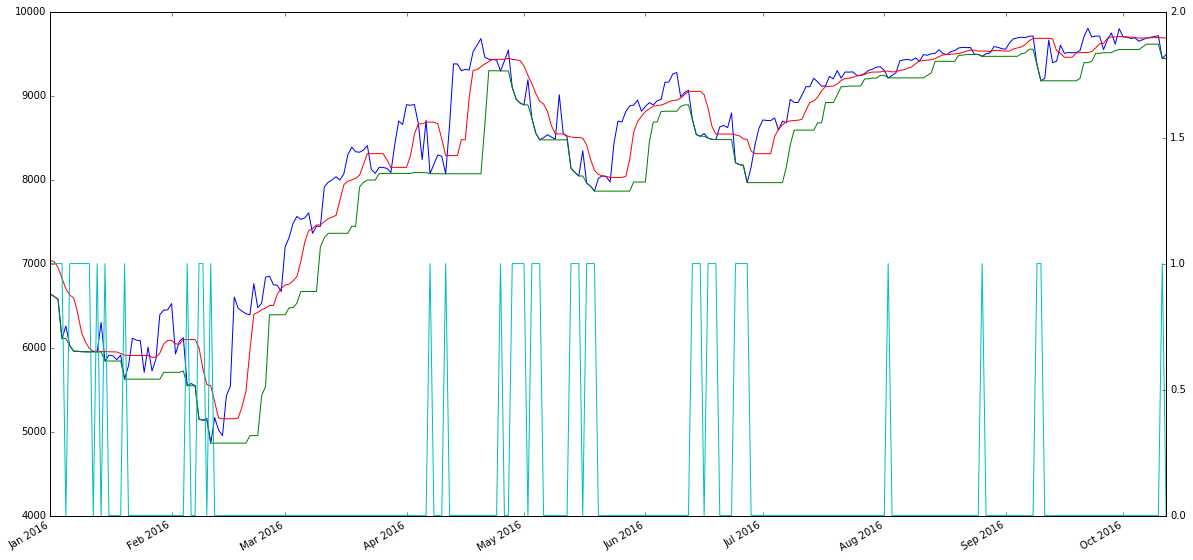

In [62]:
figsize(20,10)
exo_series.ix['2016'].plot()
exo_series.rolling(10).min().ix['2016'].plot()
exo_series.rolling(10).median().ix['2016'].plot()

atr_period = 60

O = L = H = C = exo_series
period = atr_period

atr = ATR(H, L, C, period)


entry_signal = exo_series == exo_series.rolling(10).min()

entry_signal.ix['2016'].plot(secondary_y=True)

axhline(2)

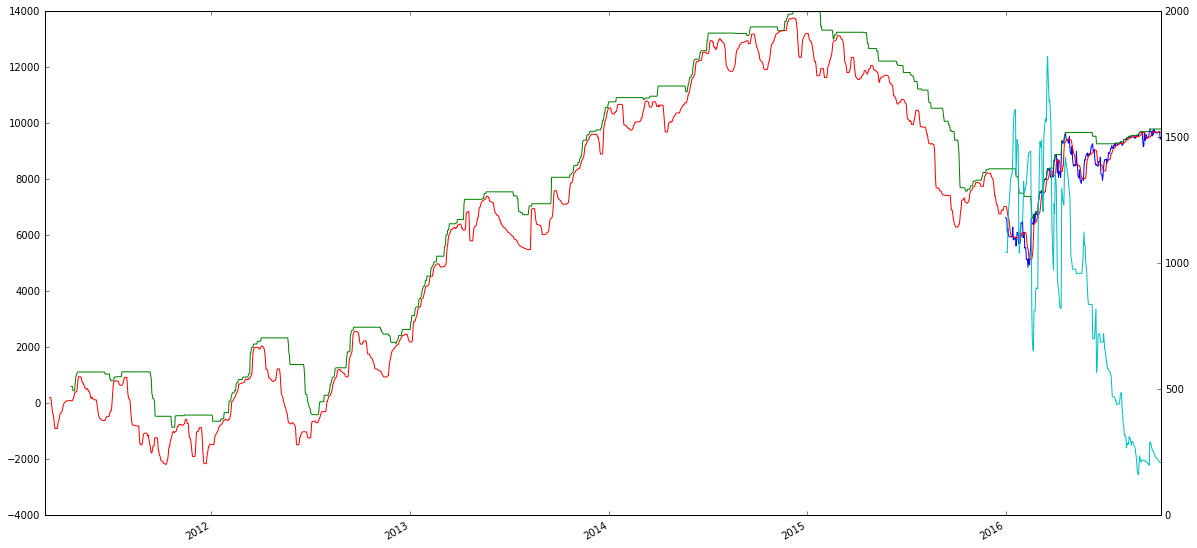

In [64]:
figsize(20,10)
exo_series.ix['2016'].plot()
exo_series.rolling(50).max().ix['2016'].plot()
exo_series.rolling(10).median().ix['2016'].plot()
(exo_series.rolling(50).max() - exo_series.rolling(50).median()).ix['2016'].plot(secondary_y=True)